In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv("../../Data/processed/final.csv")  

In [4]:
TARGET_COL = 'result'

feature_cols = [
    'num_dots',
    'num_hyphens', 
    'num_slashes',
    'num_digits',
    'num_equals',
    'ip_in_url',
    'has_highly_susp_keyword',
    'hostname_length',
    'has_additional_susp_words',
    'has_susp_word_in_path',
    'has_susp_word_in_hostname',
    'has_suspicious_tld',
    'has_uncommon_tld',
    'url_entropy',
    'subdomain_count',
    'no_www',
    'tld_length',
    'short_url',
    'consonant_pair_ratio',
    'punctuation_density',
    'hex_encoding_count',
    'num_subdirs',
    'AtSymbol',
    'NumUnderscore',
    'HasQueryString',
    # 'filename_length',

    'path_length',
    
    'max_dir_length',

    'hostname_uncommonness',
    'longest_dir_uncommonness'
]

X = df[feature_cols]  
y = df[TARGET_COL] 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                     random_state=42)


In [5]:
dt = DecisionTreeClassifier(criterion='entropy',
                            class_weight='balanced',
                            random_state=42)


In [6]:
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [7]:
from IPython.display import Markdown, display
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


accuracy = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

display(Markdown(f"**Accuracy:** `{accuracy:.4f}`"))
display(Markdown(f"**Matrice de confusion:**\n```\n{conf}\n```"))
display(Markdown(f"**Rapport de classification:**\n```\n{report}\n```"))


**Accuracy:** `0.9805`

**Matrice de confusion:**
```
[[68087  1061]
 [ 1061 38888]]
```

**Rapport de classification:**
```
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     69148
         1.0       0.97      0.97      0.97     39949

    accuracy                           0.98    109097
   macro avg       0.98      0.98      0.98    109097
weighted avg       0.98      0.98      0.98    109097

```

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,  f1_score

y_pred= dt.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)  

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall: {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score: {f1:.4f} ({f1*100:.2f}%)")

Accuracy: 0.9805 (98.05%)
Precision: 0.9734 (97.34%)
Recall: 0.9734 (97.34%)
F1-Score: 0.9734 (97.34%)


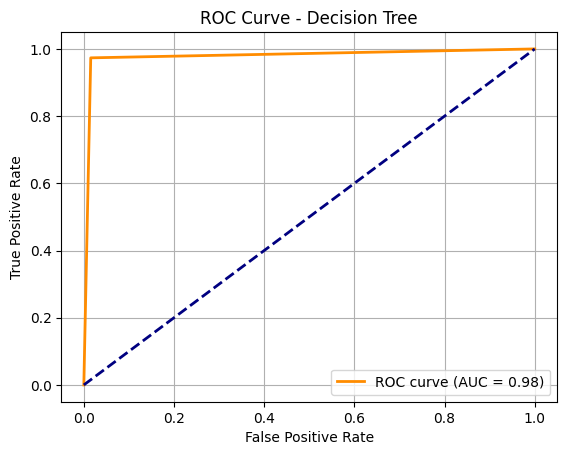

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = dt.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
